In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def cumulative_average(x):
    window = 1
    cumulative = []
    for v in x.cumsum():
        cumulative.append(v/float(window))
        window+=1
    return np.array(cumulative)

In [68]:
RNN_data = np.load("RNN_learning_curves.npy")
GRU_data = np.load("GRU_learning_curves.npy")
TRA_data = np.load("TRANSFORMER_learning_curves.npy")

In [69]:
RNN_val_losses = np.array(RNN_data.item()['val_losses'])
GRU_val_losses = np.array(GRU_data.item()['val_losses'])
TRA_val_losses = np.array(TRA_data.item()['val_losses'])

In [70]:
RNN_running_mean = cumulative_average(RNN_val_losses)
GRU_running_mean = cumulative_average(GRU_val_losses)
TRA_running_mean = cumulative_average(TRA_val_losses)

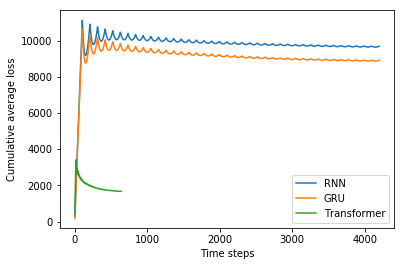

In [78]:
RNN_range = np.arange(0,len(RNN_running_mean))
GRU_range = np.arange(0,len(GRU_running_mean))
TRA_range = np.arange(0,len(TRA_running_mean))
fixed_range = np.arange(0,500)

plt.plot(RNN_range,RNN_running_mean,label='RNN')
plt.plot(GRU_range,GRU_running_mean,label='GRU')
plt.plot(TRA_range,TRA_running_mean,label='Transformer')
plt.legend()
plt.xlabel("Time steps")
plt.ylabel("Cumulative average loss")
plt.savefig("5_1_cum_average_loss.png")